# Individual Currency Strategy Analysis

This notebook analyzes the contrarian strategy performance for each individual currency pair.
We'll examine how each currency performs under the contrarian selection logic.

In [ ]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Import our custom modules
from modules.data_loader import ForexDataLoader
from modules.signal_generator import ConrarianSignalGenerator
from modules.backtesting_engine import BacktestingEngine
from modules.portfolio_manager import PortfolioManager
from modules.performance_analyzer import PerformanceAnalyzer

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🚀 Individual Currency Strategy Analysis")
print("=" * 50)

## 1. Data Loading and Setup

In [2]:
# Initialize data loader
data_loader = ForexDataLoader('../data')

# Load all forex data
print("Loading forex data...")
prices = data_loader.load_unified_prices()
returns = data_loader.load_unified_returns()

print(f"Data period: {prices.index[0]} to {prices.index[-1]}")
print(f"Number of currency pairs: {len(prices.columns)}")
print(f"Number of trading days: {len(prices)}")

# Display available currency pairs
print("\nAvailable currency pairs:")
for i, pair in enumerate(prices.columns, 1):
    print(f"{i:2d}. {pair}")

Loading forex data...
Data period: 2000-01-03 00:00:00+00:00 to 2025-08-05 00:00:00+01:00
Number of currency pairs: 20
Number of trading days: 6677

Available currency pairs:
 1. EURUSD
 2. GBPUSD
 3. USDJPY
 4. USDCHF
 5. AUDUSD
 6. USDCAD
 7. NZDUSD
 8. EURGBP
 9. EURJPY
10. EURCHF
11. EURAUD
12. EURCAD
13. EURNZD
14. GBPJPY
15. GBPCHF
16. GBPAUD
17. GBPCAD
18. GBPNZD
19. AUDJPY
20. AUDCHF


## 2. Individual Currency Performance Analysis

In [3]:
# Calculate individual currency statistics
def calculate_currency_stats(returns_data):
    stats = {}
    
    for currency in returns_data.columns:
        currency_returns = returns_data[currency].dropna()
        
        stats[currency] = {
            'Total Return': (1 + currency_returns).prod() - 1,
            'Annualized Return': currency_returns.mean() * 252,
            'Volatility': currency_returns.std() * np.sqrt(252),
            'Sharpe Ratio': (currency_returns.mean() * 252) / (currency_returns.std() * np.sqrt(252)),
            'Max Drawdown': calculate_max_drawdown(currency_returns),
            'Skewness': currency_returns.skew(),
            'Kurtosis': currency_returns.kurtosis(),
            'Positive Days': (currency_returns > 0).sum() / len(currency_returns)
        }
    
    return pd.DataFrame(stats).T

def calculate_max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

# Calculate statistics for all currencies
currency_stats = calculate_currency_stats(returns)
currency_stats = currency_stats.round(4)

print("Individual Currency Performance Statistics:")
print("=" * 60)
display(currency_stats)

Individual Currency Performance Statistics:


,Total Return,Annualized Return,Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Positive Days
EURUSD,-0.0318,0.0047,0.1114,0.0425,-0.3998,1.6251,108.0644,0.4947
GBPUSD,-0.2263,-0.0071,0.0933,-0.0758,-0.4911,-0.5823,8.0159,0.4950
USDJPY,0.4435,0.0202,0.1126,0.1794,-0.4384,0.5715,103.1380,0.5099
USDCHF,-0.4154,-0.0181,0.1048,-0.1731,-0.4784,-2.1023,78.7035,0.5066
AUDUSD,-0.1559,0.2005,1.1062,0.1813,-0.8743,66.1804,4617.0263,0.5079
USDCAD,0.0074,0.0040,0.0861,0.0468,-0.3418,0.1914,3.3754,0.4950
NZDUSD,-0.0816,0.0038,0.1234,0.0311,-0.3968,-0.3180,3.6668,0.5011
EURGBP,0.3929,0.0161,0.0852,0.1894,-0.2897,0.6506,58.1511,0.4970
EURJPY,0.3401,0.0189,0.1127,0.1678,-0.4444,-0.1268,8.5796,0.5148
EURCHF,-0.3615,-0.0163,0.0756,-0.2156,-0.4498,-6.0652,338.2851,0.4820


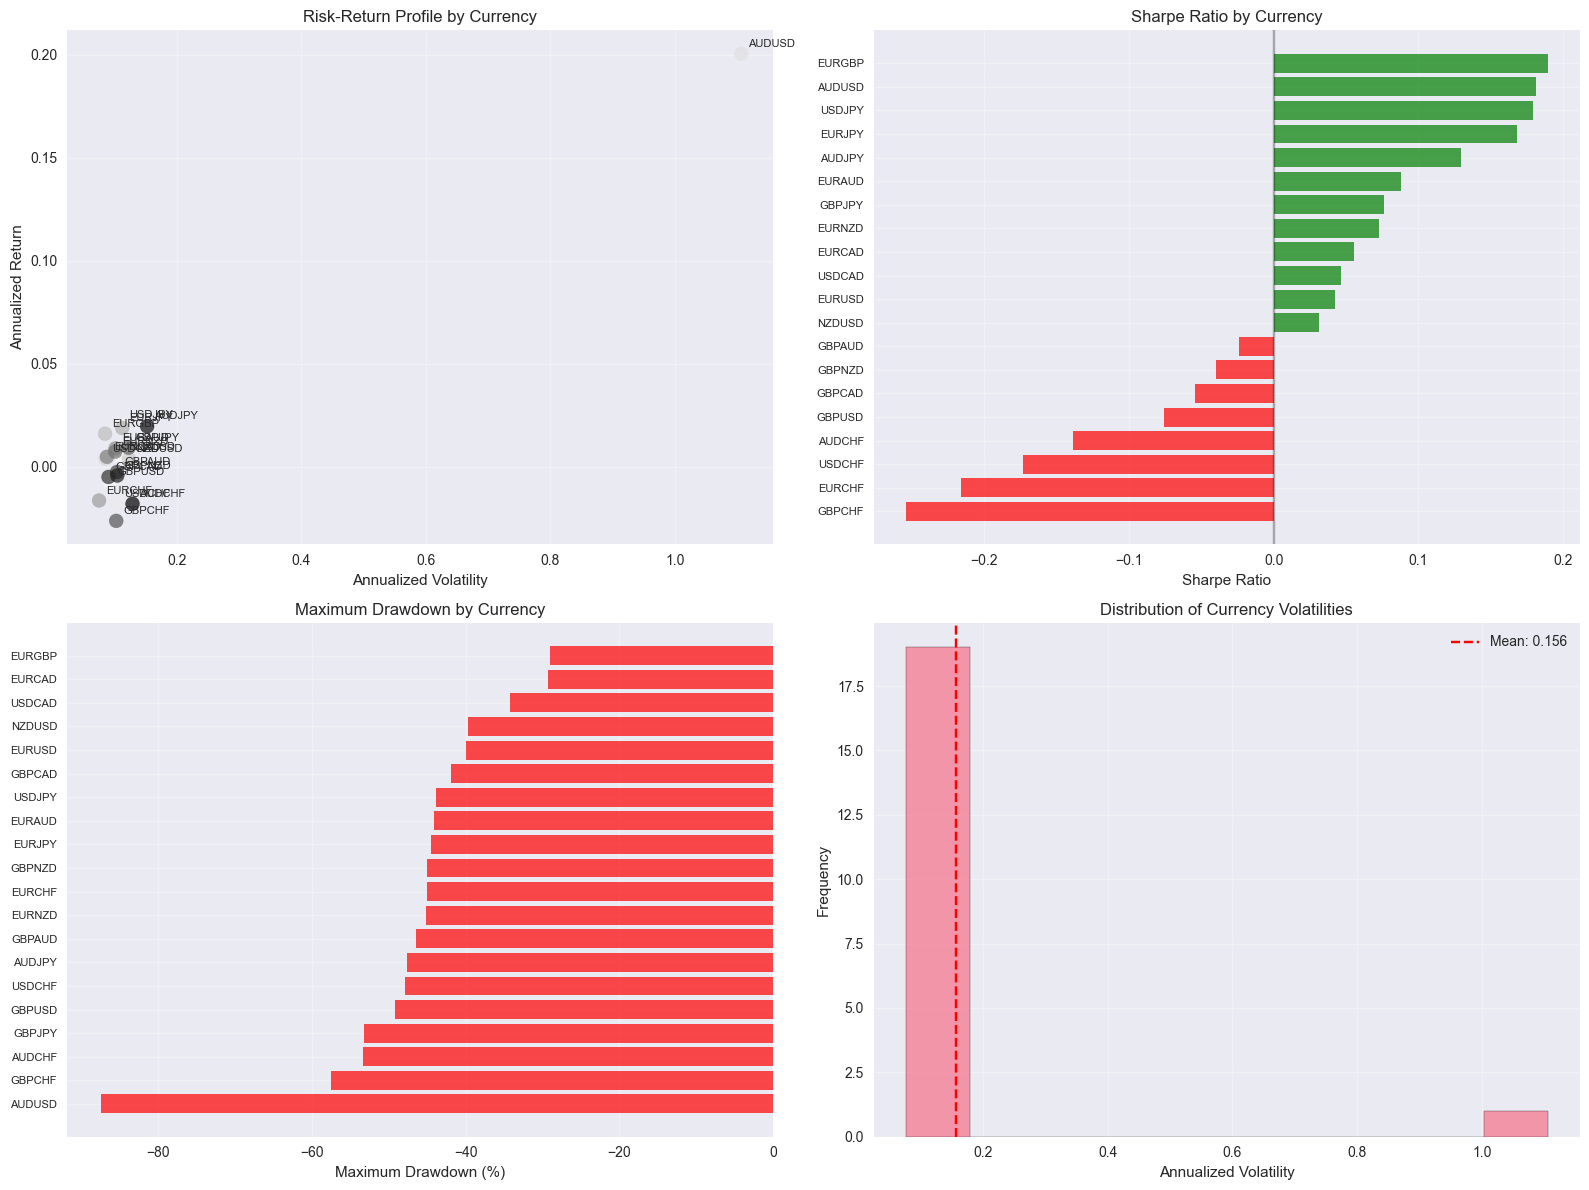

In [4]:
# Create comprehensive visualization of individual currency performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Risk-Return Scatter Plot
axes[0,0].scatter(currency_stats['Volatility'], currency_stats['Annualized Return'], 
                  s=100, alpha=0.7, c=range(len(currency_stats)))
for i, currency in enumerate(currency_stats.index):
    axes[0,0].annotate(currency.replace('_X', ''), 
                       (currency_stats.loc[currency, 'Volatility'], 
                        currency_stats.loc[currency, 'Annualized Return']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[0,0].set_xlabel('Annualized Volatility')
axes[0,0].set_ylabel('Annualized Return')
axes[0,0].set_title('Risk-Return Profile by Currency')
axes[0,0].grid(True, alpha=0.3)

# 2. Sharpe Ratio Ranking
sharpe_sorted = currency_stats.sort_values('Sharpe Ratio', ascending=True)
colors = ['red' if x < 0 else 'green' for x in sharpe_sorted['Sharpe Ratio']]
axes[0,1].barh(range(len(sharpe_sorted)), sharpe_sorted['Sharpe Ratio'], color=colors, alpha=0.7)
axes[0,1].set_yticks(range(len(sharpe_sorted)))
axes[0,1].set_yticklabels([x.replace('_X', '') for x in sharpe_sorted.index], fontsize=8)
axes[0,1].set_xlabel('Sharpe Ratio')
axes[0,1].set_title('Sharpe Ratio by Currency')
axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[0,1].grid(True, alpha=0.3)

# 3. Maximum Drawdown Analysis
drawdown_sorted = currency_stats.sort_values('Max Drawdown', ascending=True)
axes[1,0].barh(range(len(drawdown_sorted)), drawdown_sorted['Max Drawdown'] * 100, 
               color='red', alpha=0.7)
axes[1,0].set_yticks(range(len(drawdown_sorted)))
axes[1,0].set_yticklabels([x.replace('_X', '') for x in drawdown_sorted.index], fontsize=8)
axes[1,0].set_xlabel('Maximum Drawdown (%)')
axes[1,0].set_title('Maximum Drawdown by Currency')
axes[1,0].grid(True, alpha=0.3)

# 4. Volatility Distribution
axes[1,1].hist(currency_stats['Volatility'], bins=10, alpha=0.7, edgecolor='black')
axes[1,1].axvline(currency_stats['Volatility'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {currency_stats["Volatility"].mean():.3f}')
axes[1,1].set_xlabel('Annualized Volatility')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Currency Volatilities')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Contrarian Strategy Selection Analysis

In [5]:
# Analyze how often each currency is selected by the contrarian strategy
def analyze_contrarian_selections(n_worst=5, lookback=20):
    signal_generator = ConrarianSignalGenerator(
        n_worst_performers=n_worst, 
        lookback_days=lookback
    )
    
    signal_output = signal_generator.generate_signals(prices, returns)
    signals = signal_output['binary_signals']  # Extract binary signals from dict
    
    # Count selections per currency
    selection_counts = signals.sum()
    selection_percentage = (selection_counts / len(signals)) * 100
    
    # Analyze selection patterns
    results = pd.DataFrame({
        'Selection Count': selection_counts,
        'Selection %': selection_percentage,
        'Expected %': (n_worst / len(prices.columns)) * 100
    })
    
    results['Over/Under Selection'] = results['Selection %'] - results['Expected %']
    
    return results.round(2), signals

# Test different parameter combinations
parameter_combinations = [
    (3, 10), (5, 15), (5, 20), (7, 30)
]

selection_analysis = {}
for n_worst, lookback in parameter_combinations:
    selection_results, signals = analyze_contrarian_selections(n_worst, lookback)
    selection_analysis[f'N={n_worst}, M={lookback}'] = selection_results
    
    print(f"\nContrarian Selection Analysis (N={n_worst}, M={lookback}):")
    print("=" * 70)
    display(selection_results.sort_values('Selection %', ascending=False))


Contrarian Selection Analysis (N=3, M=10):


,Selection Count,Selection %,Expected %,Over/Under Selection
USDJPY,1432,21.45,15.0,6.45
EURGBP,1415,21.19,15.0,6.19
NZDUSD,1237,18.53,15.0,3.53
USDCHF,1171,17.54,15.0,2.54
AUDCHF,1116,16.71,15.0,1.71
GBPNZD,1102,16.50,15.0,1.50
EURNZD,1101,16.49,15.0,1.49
AUDJPY,1085,16.25,15.0,1.25
EURAUD,1028,15.40,15.0,0.40
AUDUSD,1023,15.32,15.0,0.32



Contrarian Selection Analysis (N=5, M=15):


,Selection Count,Selection %,Expected %,Over/Under Selection
EURGBP,2163,32.39,25.0,7.39
USDJPY,2034,30.46,25.0,5.46
NZDUSD,1792,26.84,25.0,1.84
USDCHF,1752,26.24,25.0,1.24
AUDCHF,1720,25.76,25.0,0.76
GBPAUD,1704,25.52,25.0,0.52
GBPNZD,1677,25.12,25.0,0.12
EURNZD,1671,25.03,25.0,0.03
EURAUD,1590,23.81,25.0,-1.19
USDCAD,1560,23.36,25.0,-1.64



Contrarian Selection Analysis (N=5, M=20):


,Selection Count,Selection %,Expected %,Over/Under Selection
EURGBP,2146,32.14,25.0,7.14
USDJPY,2029,30.39,25.0,5.39
USDCHF,1791,26.82,25.0,1.82
NZDUSD,1771,26.52,25.0,1.52
AUDCHF,1717,25.72,25.0,0.72
GBPAUD,1696,25.40,25.0,0.40
GBPNZD,1626,24.35,25.0,-0.65
EURNZD,1612,24.14,25.0,-0.86
EURAUD,1575,23.59,25.0,-1.41
AUDJPY,1567,23.47,25.0,-1.53



Contrarian Selection Analysis (N=7, M=30):


,Selection Count,Selection %,Expected %,Over/Under Selection
EURGBP,2790,41.79,35.0,6.79
USDJPY,2554,38.25,35.0,3.25
USDCHF,2352,35.23,35.0,0.23
AUDCHF,2267,33.95,35.0,-1.05
NZDUSD,2226,33.34,35.0,-1.66
GBPAUD,2208,33.07,35.0,-1.93
USDCAD,2182,32.68,35.0,-2.32
GBPNZD,2172,32.53,35.0,-2.47
EURAUD,2134,31.96,35.0,-3.04
EURNZD,2115,31.68,35.0,-3.32


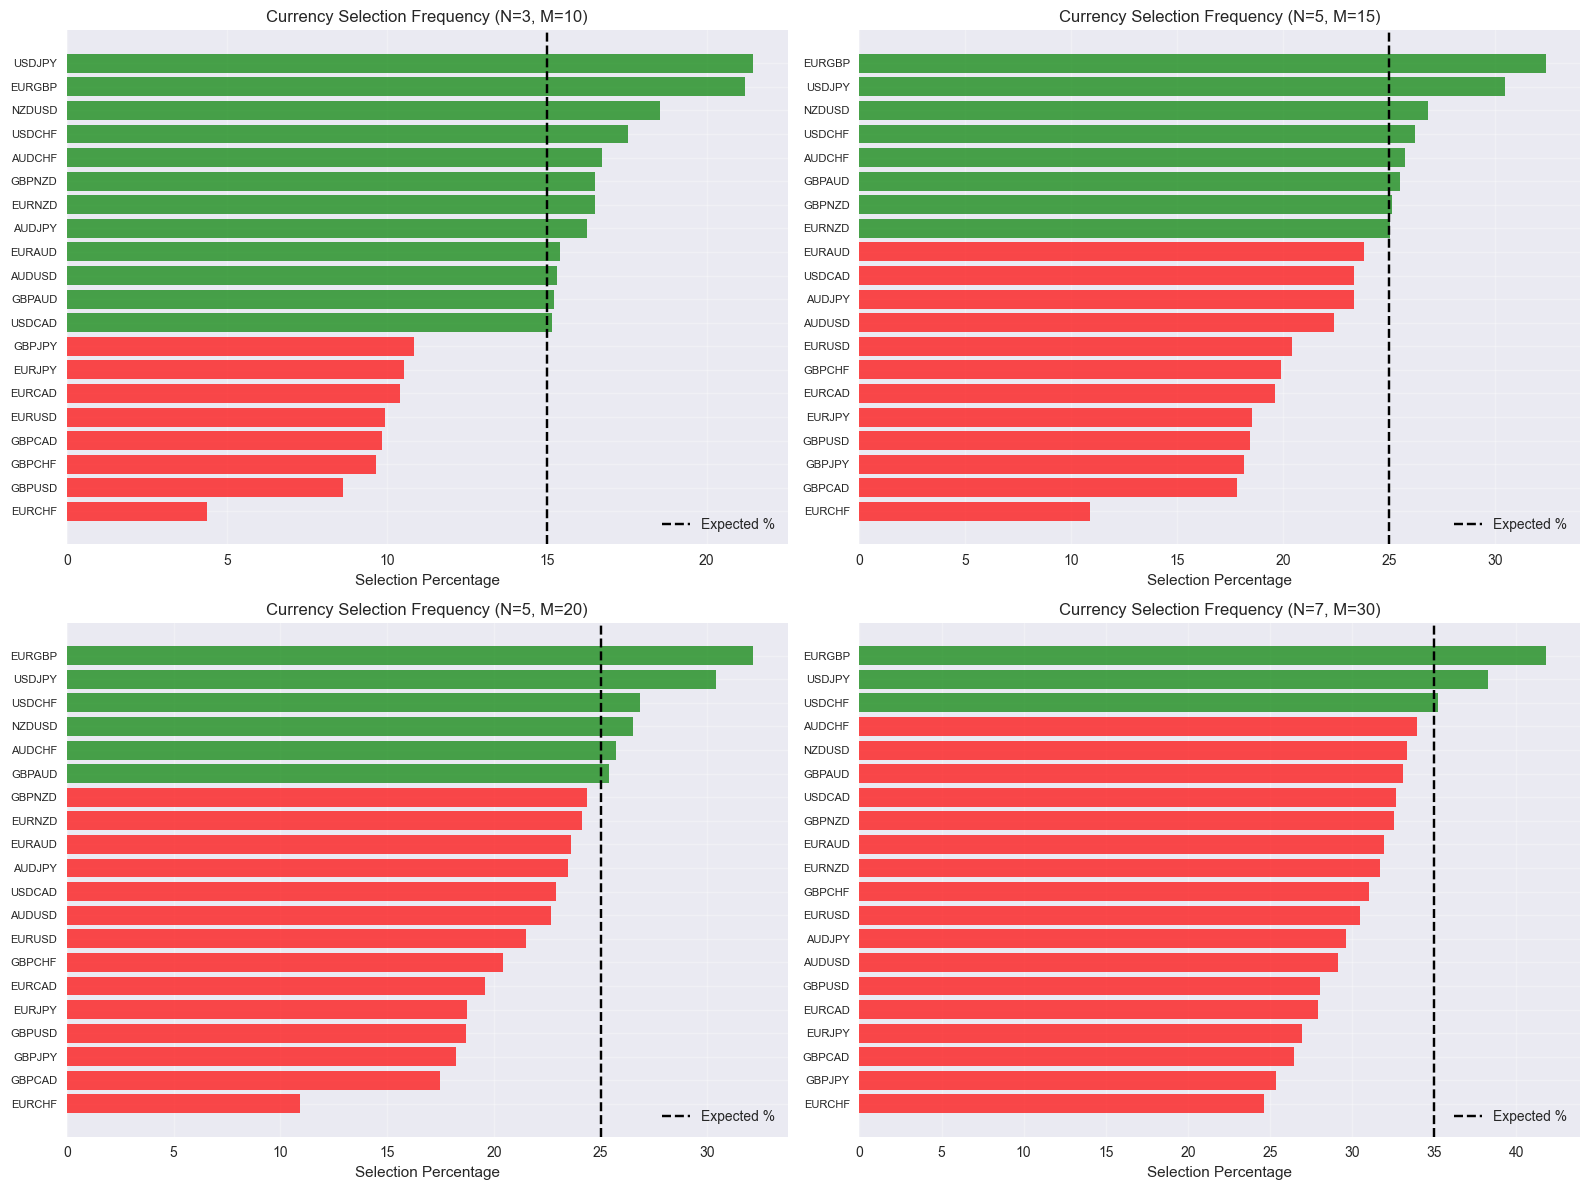

In [6]:
# Visualize selection patterns across different parameters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, (params, analysis) in enumerate(selection_analysis.items()):
    # Sort by selection percentage
    sorted_analysis = analysis.sort_values('Selection %', ascending=True)
    
    # Color code: red for under-selected, green for over-selected
    colors = ['red' if x < 0 else 'green' for x in sorted_analysis['Over/Under Selection']]
    
    axes[i].barh(range(len(sorted_analysis)), sorted_analysis['Selection %'], 
                 color=colors, alpha=0.7)
    axes[i].axvline(sorted_analysis['Expected %'].iloc[0], color='black', 
                    linestyle='--', label='Expected %')
    axes[i].set_yticks(range(len(sorted_analysis)))
    axes[i].set_yticklabels([x.replace('_X', '') for x in sorted_analysis.index], fontsize=8)
    axes[i].set_xlabel('Selection Percentage')
    axes[i].set_title(f'Currency Selection Frequency ({params})')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Performance When Selected Analysis

In [7]:
# Analyze performance of currencies when they are selected by contrarian strategy
def analyze_performance_when_selected(signals, returns_data):
    performance_when_selected = {}
    
    for currency in returns_data.columns:
        # Get returns when this currency was selected
        selected_mask = signals[currency] == 1
        selected_returns = returns_data[currency][selected_mask]
        
        # Get returns when this currency was NOT selected  
        not_selected_returns = returns_data[currency][~selected_mask]
        
        if len(selected_returns) > 0 and len(not_selected_returns) > 0:
            performance_when_selected[currency] = {
                'Selected Days': len(selected_returns),
                'Avg Return When Selected': selected_returns.mean(),
                'Avg Return When Not Selected': not_selected_returns.mean(),
                'Difference': selected_returns.mean() - not_selected_returns.mean(),
                'Selected Volatility': selected_returns.std(),
                'Not Selected Volatility': not_selected_returns.std(),
                'Selected Win Rate': (selected_returns > 0).sum() / len(selected_returns),
                'Not Selected Win Rate': (not_selected_returns > 0).sum() / len(not_selected_returns)
            }
    
    return pd.DataFrame(performance_when_selected).T

# Use the signals from N=5, M=20 configuration for detailed analysis
signal_generator = ConrarianSignalGenerator(n_worst_performers=5, lookback_days=20)
signal_output = signal_generator.generate_signals(prices, returns)
detailed_signals = signal_output['binary_signals']  # Extract binary signals from dict

performance_analysis = analyze_performance_when_selected(detailed_signals, returns)
performance_analysis = performance_analysis.round(4)

print("Performance When Selected vs Not Selected (N=5, M=20):")
print("=" * 70)
display(performance_analysis.sort_values('Difference', ascending=False))

Performance When Selected vs Not Selected (N=5, M=20):


,Selected Days,Avg Return When Selected,Avg Return When Not Selected,Difference,Selected Volatility,Not Selected Volatility,Selected Win Rate,Not Selected Win Rate
GBPCHF,1363.0,0.0002,-0.0002,0.0004,0.0073,0.0062,0.5077,0.4071
AUDCHF,1717.0,0.0002,-0.0002,0.0004,0.0097,0.0074,0.5044,0.4001
EURCHF,730.0,0.0003,-0.0001,0.0004,0.0064,0.0045,0.5096,0.4139
EURJPY,1251.0,0.0003,0.0000,0.0003,0.0090,0.0065,0.5324,0.4350
EURCAD,1306.0,0.0001,0.0000,0.0001,0.0052,0.0056,0.4931,0.4082
GBPCAD,1168.0,0.0000,-0.0000,0.0001,0.0057,0.0057,0.4949,0.4109
USDCAD,1529.0,0.0001,-0.0000,0.0001,0.0052,0.0055,0.5036,0.3995
NZDUSD,1771.0,0.0001,-0.0000,0.0001,0.0076,0.0079,0.5020,0.3965
GBPNZD,1626.0,-0.0000,-0.0000,0.0000,0.0065,0.0066,0.4902,0.4046
EURAUD,1575.0,0.0000,0.0000,-0.0000,0.0057,0.0067,0.4819,0.3793


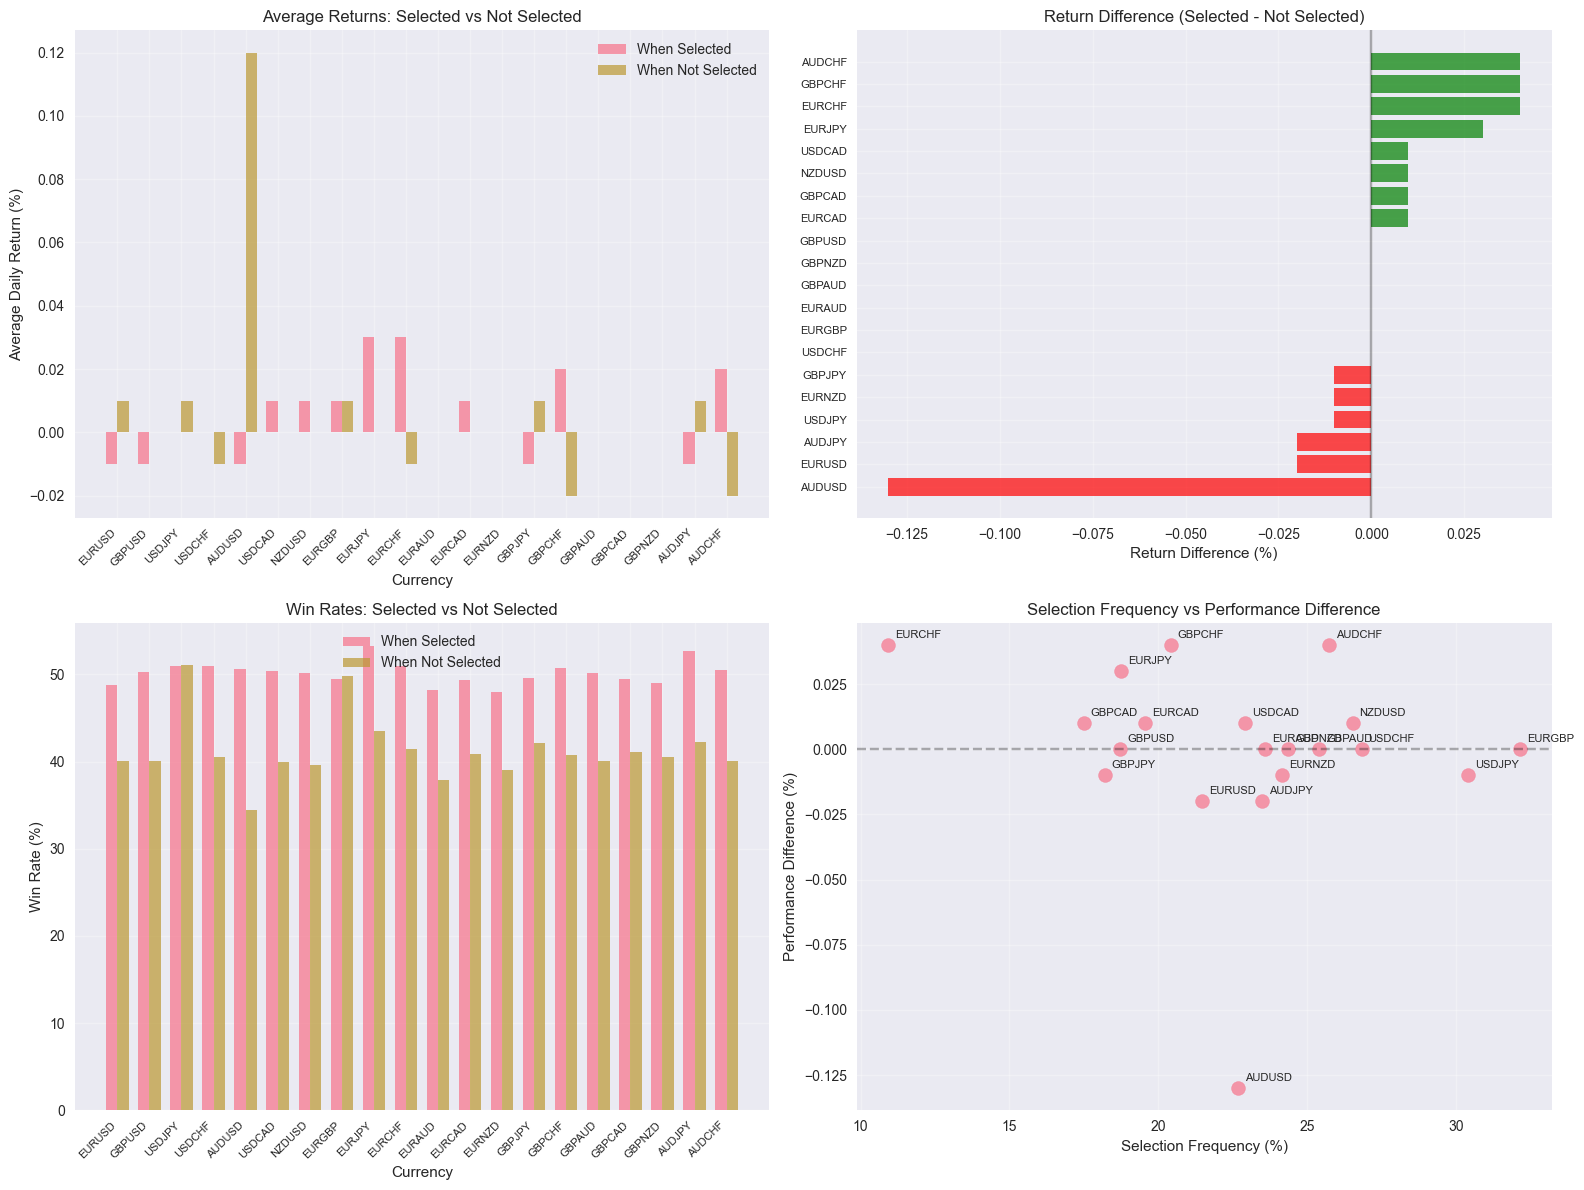

In [8]:
# Visualize performance difference when selected vs not selected
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average returns comparison
selected_returns = performance_analysis['Avg Return When Selected'] * 100
not_selected_returns = performance_analysis['Avg Return When Not Selected'] * 100

x_pos = np.arange(len(performance_analysis))
width = 0.35

axes[0,0].bar(x_pos - width/2, selected_returns, width, label='When Selected', alpha=0.7)
axes[0,0].bar(x_pos + width/2, not_selected_returns, width, label='When Not Selected', alpha=0.7)
axes[0,0].set_xlabel('Currency')
axes[0,0].set_ylabel('Average Daily Return (%)')
axes[0,0].set_title('Average Returns: Selected vs Not Selected')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels([x.replace('_X', '') for x in performance_analysis.index], 
                          rotation=45, ha='right', fontsize=8)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Performance difference
difference_sorted = performance_analysis.sort_values('Difference', ascending=True)
colors = ['red' if x < 0 else 'green' for x in difference_sorted['Difference']]
axes[0,1].barh(range(len(difference_sorted)), difference_sorted['Difference'] * 100, 
               color=colors, alpha=0.7)
axes[0,1].set_yticks(range(len(difference_sorted)))
axes[0,1].set_yticklabels([x.replace('_X', '') for x in difference_sorted.index], fontsize=8)
axes[0,1].set_xlabel('Return Difference (%)')
axes[0,1].set_title('Return Difference (Selected - Not Selected)')
axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[0,1].grid(True, alpha=0.3)

# 3. Win rate comparison
selected_winrate = performance_analysis['Selected Win Rate'] * 100
not_selected_winrate = performance_analysis['Not Selected Win Rate'] * 100

axes[1,0].bar(x_pos - width/2, selected_winrate, width, label='When Selected', alpha=0.7)
axes[1,0].bar(x_pos + width/2, not_selected_winrate, width, label='When Not Selected', alpha=0.7)
axes[1,0].set_xlabel('Currency')
axes[1,0].set_ylabel('Win Rate (%)')
axes[1,0].set_title('Win Rates: Selected vs Not Selected')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels([x.replace('_X', '') for x in performance_analysis.index], 
                          rotation=45, ha='right', fontsize=8)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Selection frequency vs performance difference
selection_freq = selection_analysis['N=5, M=20']['Selection %']
perf_diff = performance_analysis['Difference'] * 100

axes[1,1].scatter(selection_freq, perf_diff, s=100, alpha=0.7)
for currency in performance_analysis.index:
    axes[1,1].annotate(currency.replace('_X', ''), 
                       (selection_freq[currency], perf_diff[currency]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,1].set_xlabel('Selection Frequency (%)')
axes[1,1].set_ylabel('Performance Difference (%)')
axes[1,1].set_title('Selection Frequency vs Performance Difference')
axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Time Series Analysis of Individual Currencies

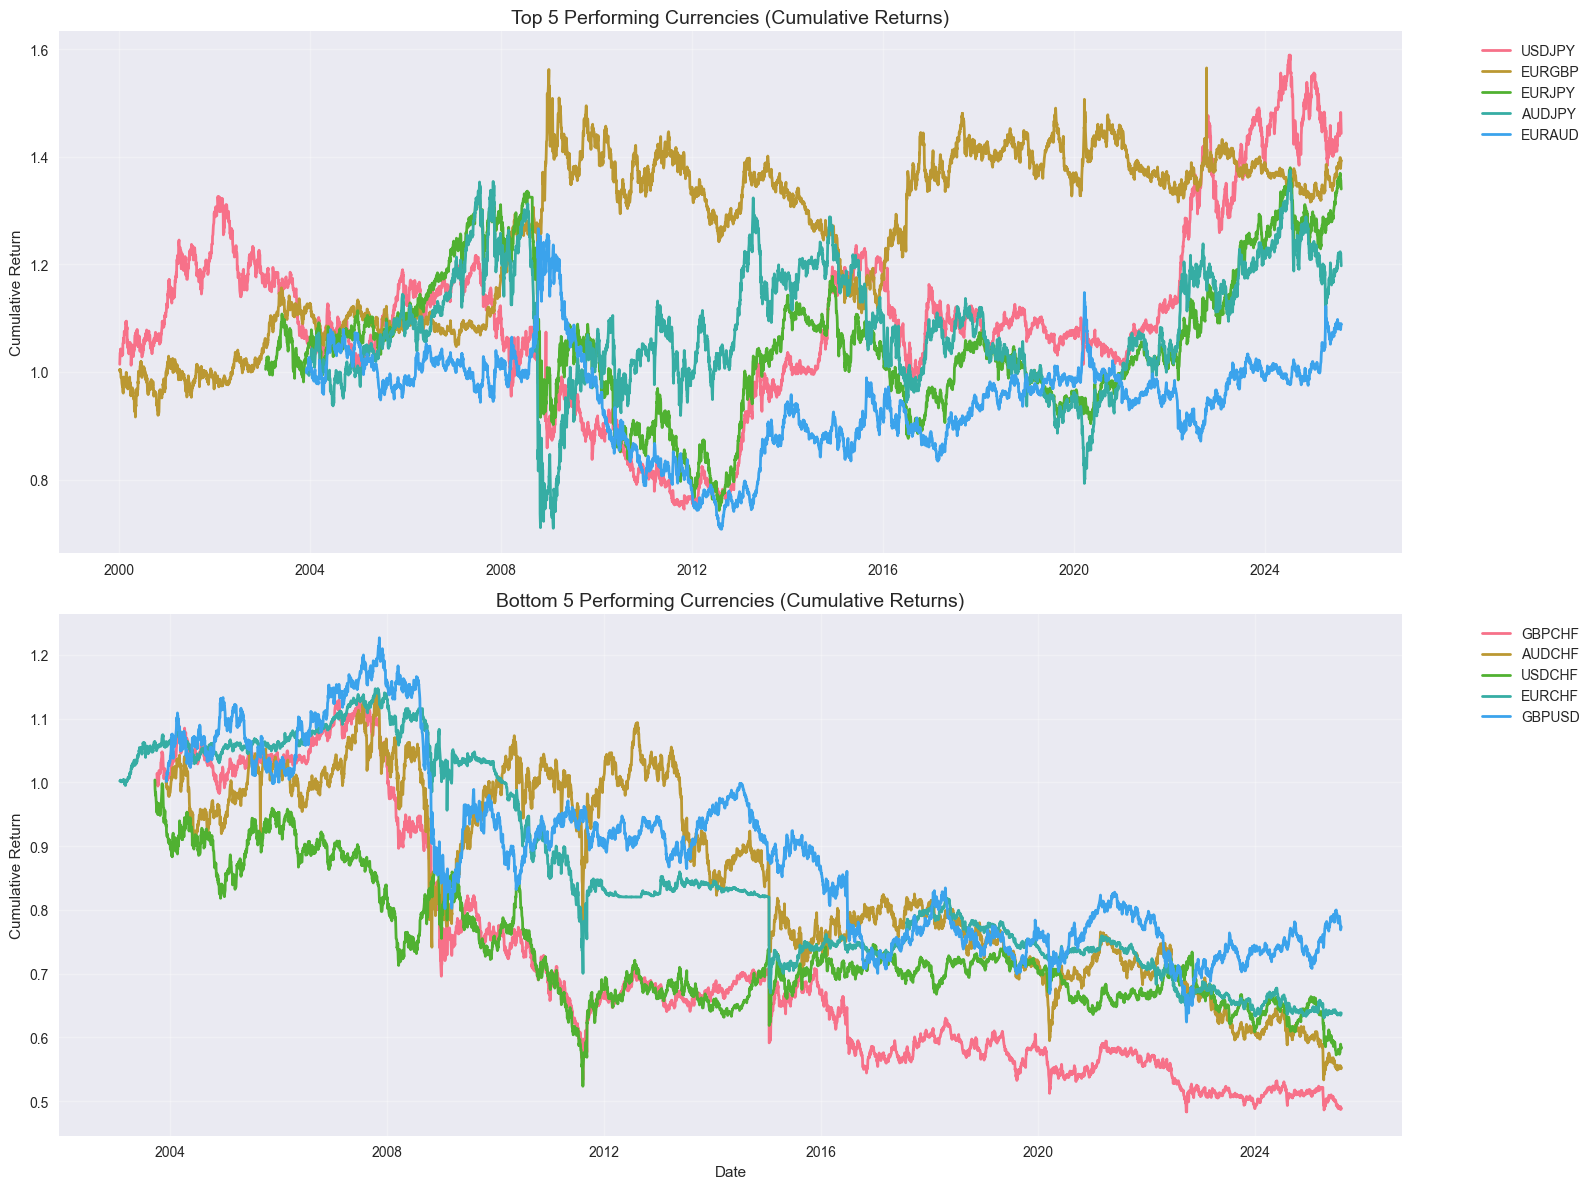


Top 5 Performing Currencies:
USDJPY: 44.35%
EURGBP: 39.29%
EURJPY: 34.01%
AUDJPY: 19.73%
EURAUD: 8.87%

Bottom 5 Performing Currencies:
GBPCHF: -51.05%
AUDCHF: -44.65%
USDCHF: -41.54%
EURCHF: -36.15%
GBPUSD: -22.63%


In [9]:
# Plot cumulative performance of top and bottom performers
def plot_cumulative_performance(returns_data, top_n=5):
    # Calculate cumulative returns
    cumulative_returns = (1 + returns_data).cumprod()
    
    # Get top and bottom performers by total return
    total_returns = cumulative_returns.iloc[-1] - 1
    top_performers = total_returns.nlargest(top_n)
    bottom_performers = total_returns.nsmallest(top_n)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
    
    # Plot top performers
    for currency in top_performers.index:
        ax1.plot(cumulative_returns.index, cumulative_returns[currency], 
                 label=currency.replace('_X', ''), linewidth=2)
    
    ax1.set_title(f'Top {top_n} Performing Currencies (Cumulative Returns)', fontsize=14)
    ax1.set_ylabel('Cumulative Return')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Plot bottom performers
    for currency in bottom_performers.index:
        ax2.plot(cumulative_returns.index, cumulative_returns[currency], 
                 label=currency.replace('_X', ''), linewidth=2)
    
    ax2.set_title(f'Bottom {top_n} Performing Currencies (Cumulative Returns)', fontsize=14)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Cumulative Return')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return top_performers, bottom_performers

top_performers, bottom_performers = plot_cumulative_performance(returns)

print("\nTop 5 Performing Currencies:")
for currency, return_pct in top_performers.items():
    print(f"{currency.replace('_X', '')}: {return_pct:.2%}")

print("\nBottom 5 Performing Currencies:")
for currency, return_pct in bottom_performers.items():
    print(f"{currency.replace('_X', '')}: {return_pct:.2%}")

## 6. Correlation Analysis

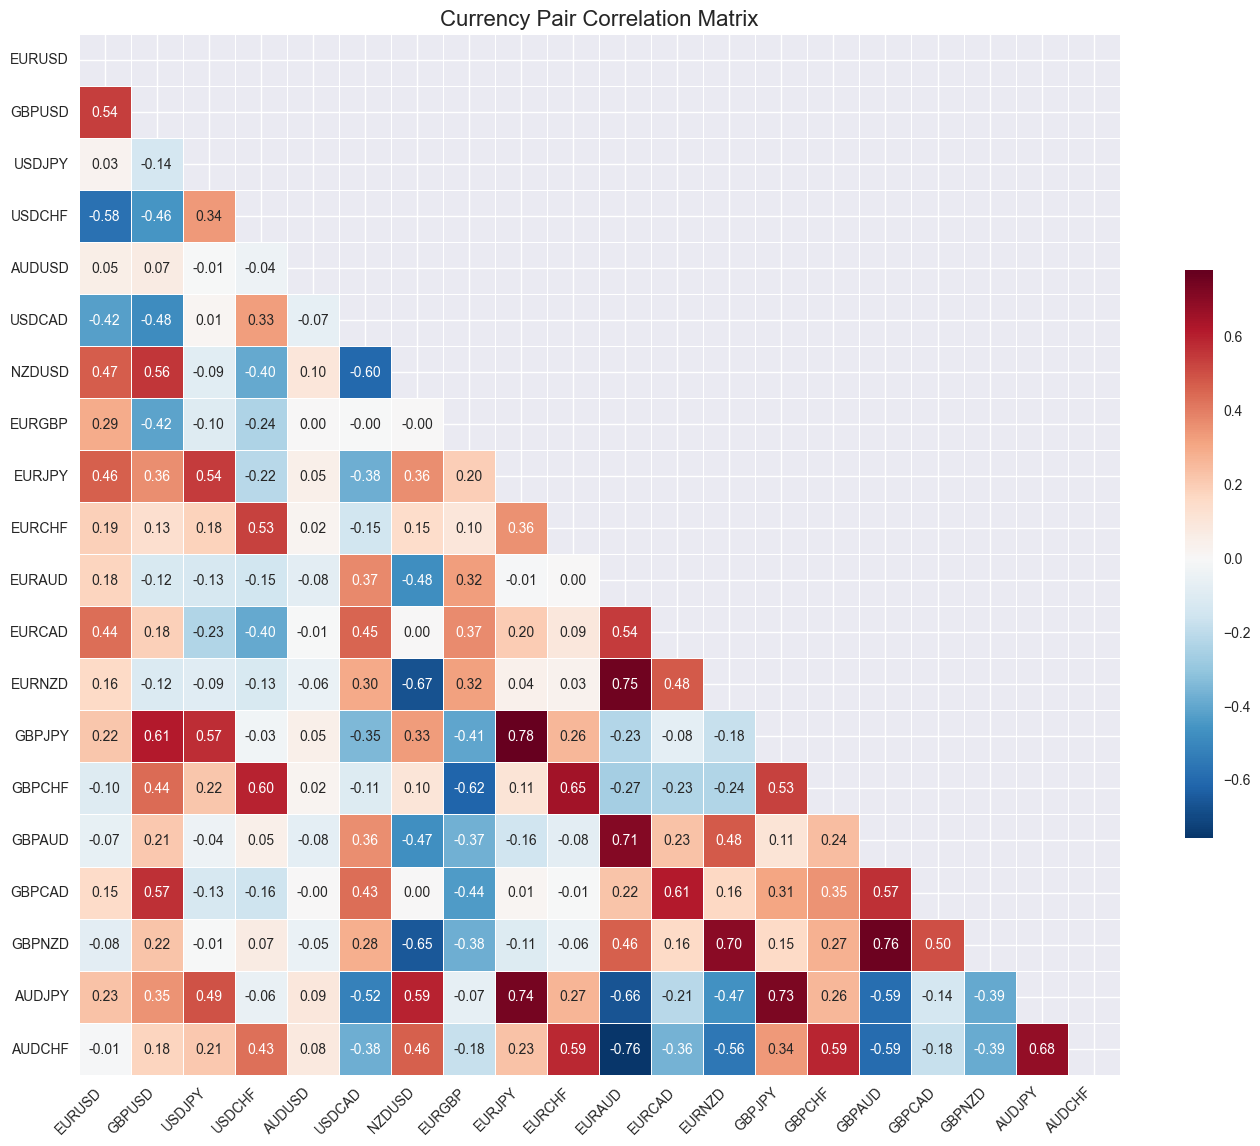


Highest Correlations:
           Pair  Correlation
EURJPY - GBPJPY     0.779138
GBPAUD - GBPNZD     0.758283
EURAUD - EURNZD     0.753460
EURJPY - AUDJPY     0.741436
GBPJPY - AUDJPY     0.730935
EURAUD - GBPAUD     0.711219
EURNZD - GBPNZD     0.695773
AUDJPY - AUDCHF     0.678104
EURCHF - GBPCHF     0.652245
GBPUSD - GBPJPY     0.613089

Lowest Correlations:
           Pair  Correlation
EURAUD - AUDCHF    -0.760416
NZDUSD - EURNZD    -0.672131
EURAUD - AUDJPY    -0.664805
NZDUSD - GBPNZD    -0.652791
EURGBP - GBPCHF    -0.620225
USDCAD - NZDUSD    -0.604656
GBPAUD - AUDCHF    -0.592742
GBPAUD - AUDJPY    -0.591860
EURUSD - USDCHF    -0.577675
EURNZD - AUDCHF    -0.560147


In [10]:
# Calculate and visualize correlation matrix
correlation_matrix = returns.corr()

# Create heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.title('Currency Pair Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find most and least correlated pairs
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_pairs.append({
            'Pair': f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}",
            'Correlation': correlation_matrix.iloc[i, j]
        })

correlation_df = pd.DataFrame(correlation_pairs)

print("\nHighest Correlations:")
print(correlation_df.nlargest(10, 'Correlation').to_string(index=False))

print("\nLowest Correlations:")
print(correlation_df.nsmallest(10, 'Correlation').to_string(index=False))

## 7. Summary and Insights

In [11]:
# Generate summary insights
print("📊 INDIVIDUAL CURRENCY STRATEGY ANALYSIS SUMMARY")
print("=" * 70)

print("\n🎯 KEY PERFORMANCE INSIGHTS:")
print("-" * 30)
best_sharpe = currency_stats.idxmax()['Sharpe Ratio'].replace('_X', '')
worst_sharpe = currency_stats.idxmin()['Sharpe Ratio'].replace('_X', '')
print(f"• Best Sharpe Ratio: {best_sharpe} ({currency_stats.max()['Sharpe Ratio']:.3f})")
print(f"• Worst Sharpe Ratio: {worst_sharpe} ({currency_stats.min()['Sharpe Ratio']:.3f})")

lowest_vol = currency_stats.idxmin()['Volatility'].replace('_X', '')
highest_vol = currency_stats.idxmax()['Volatility'].replace('_X', '')
print(f"• Lowest Volatility: {lowest_vol} ({currency_stats.min()['Volatility']:.3f})")
print(f"• Highest Volatility: {highest_vol} ({currency_stats.max()['Volatility']:.3f})")

print("\n🎲 CONTRARIAN STRATEGY EFFECTIVENESS:")
print("-" * 40)
positive_diff_count = (performance_analysis['Difference'] > 0).sum()
total_currencies = len(performance_analysis)
success_rate = positive_diff_count / total_currencies * 100

print(f"• Currencies performing better when selected: {positive_diff_count}/{total_currencies} ({success_rate:.1f}%)")
avg_diff = performance_analysis['Difference'].mean() * 100
print(f"• Average performance difference: {avg_diff:.3f}% per day")
print(f"• Annualized difference: {avg_diff * 252:.2f}%")

print("\n📈 DIVERSIFICATION INSIGHTS:")
print("-" * 30)
avg_correlation = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean()
print(f"• Average pairwise correlation: {avg_correlation:.3f}")
print(f"• Number of currency pairs: {len(prices.columns)}")
print(f"• Data period: {len(prices)} trading days")

print("\n💡 STRATEGY RECOMMENDATIONS:")
print("-" * 35)
if success_rate > 60:
    print("• ✅ Contrarian strategy shows positive edge across majority of currencies")
else:
    print("• ⚠️ Contrarian strategy shows mixed results - consider parameter optimization")

if avg_correlation < 0.5:
    print("• ✅ Good diversification potential across currency pairs")
else:
    print("• ⚠️ High correlation between pairs - consider subset selection")

if avg_diff > 0:
    print("• ✅ Positive mean reversion effect detected")
else:
    print("• ⚠️ Negative mean reversion - momentum might be stronger")

print("\n" + "="*70)
print("Analysis complete! Proceed to Portfolio Analysis notebook for full strategy results.")

📊 INDIVIDUAL CURRENCY STRATEGY ANALYSIS SUMMARY

🎯 KEY PERFORMANCE INSIGHTS:
------------------------------
• Best Sharpe Ratio: EURGBP (0.189)
• Worst Sharpe Ratio: GBPCHF (-0.254)
• Lowest Volatility: EURCHF (0.076)
• Highest Volatility: AUDUSD (1.106)

🎲 CONTRARIAN STRATEGY EFFECTIVENESS:
----------------------------------------
• Currencies performing better when selected: 8/20 (40.0%)
• Average performance difference: -0.001% per day
• Annualized difference: -0.13%

📈 DIVERSIFICATION INSIGHTS:
------------------------------
• Average pairwise correlation: 0.072
• Number of currency pairs: 20
• Data period: 6677 trading days

💡 STRATEGY RECOMMENDATIONS:
-----------------------------------
• ⚠️ Contrarian strategy shows mixed results - consider parameter optimization
• ✅ Good diversification potential across currency pairs
• ⚠️ Negative mean reversion - momentum might be stronger

Analysis complete! Proceed to Portfolio Analysis notebook for full strategy results.
